<a href="https://colab.research.google.com/github/AstroNoodles/Mini-Projects/blob/bfs/Train_Stations_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Stations Notebook

We want to find the minimal amount of transfers between two MTA stations which we can eventually reapply into an app n the future. We can do this via: http://web.mta.info/developers/data/nyct/subway/Stations.csv

The main parts of the csv file we may need to use are the station ID, division, stop name and daytime routes. We need to create a graph which connects the subway stations together so we can use breadth-first search to find the shortest route between the two routes.

Let's do some basic data preprocessing and visualization before we do this and import our modules!

In [0]:
import pandas as pd
from collections import deque, defaultdict
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# Read the csv file
dataset = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [0]:
dataset.head(5)

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575


# Preprocessing

For data preprocessing, I renamed some of the trains and some of the rows to make it clearer and to save some typing for later. :-)

In [0]:
# Replace the long shuttle trains with the label S

for index, row in dataset.iterrows():
    if row['Line'] == 'Franklin Ave Shuttle':
        dataset.at[index, "Daytime Routes"] = 'Fr_S'
    elif row['Line'] == 'Lexington - Shuttle':
        dataset.at[index, 'Daytime Routes'] = 'Lex_S'

dataset = dataset.iloc[:len(dataset)-1]

In [0]:
# Rename the long feature names with simple ones (id, lat, long)

kstops = dataset.drop(['Complex ID', 'Division', 'GTFS Stop ID', 'Line', 'Structure'], axis=1)
kstops.rename(index=str,columns={"GTFS Latitude" : "Lat", 'GTFS Longitude': "Long", "Station ID": "id"}, inplace=True)
kstops.head(10)

,id,Stop Name,Borough,Daytime Routes,Lat,Long
0,1,Astoria - Ditmars Blvd,Q,N W,40.775036,-73.912034
1,2,Astoria Blvd,Q,N W,40.770258,-73.917843
2,3,30 Av,Q,N W,40.766779,-73.921479
3,4,Broadway,Q,N W,40.761820,-73.925508
4,5,36 Av,Q,N W,40.756804,-73.929575
5,6,39 Av,Q,N W,40.752882,-73.932755
6,7,Lexington Av/59 St,M,N W R,40.762660,-73.967258
7,8,5 Av/59 St,M,N W R,40.764811,-73.973347
8,9,57 St - 7 Av,M,N Q R W,40.764664,-73.980658
9,10,49 St,M,N R W,40.759901,-73.984139


In [0]:
trains_stops = kstops[['Stop Name', 'Daytime Routes', 'Borough']]
trains_stops[10:20]

In [0]:
for index, row in trains_stops[:5].iterrows():
    print(index, row['Stop Name'], row['Daytime Routes'])

# Collective Procedures

Now, I collected the train stops and attempted to pair them together.

In [0]:
# Split the trains individually and gather them
nyc_trains = []

trains = trains_stops['Daytime Routes']
for many_trains in trains: # For the N W in the columns
    train_list = many_trains.split(" ") # Split the N W into ['N', 'W']
    for train in train_list: # For each char in ['N', 'W']
        nyc_trains.append(train) # add it to the list

nyc_trains = sorted(list(set(nyc_trains)))
print(nyc_trains)

In [0]:
# Gather all the stops made by a single train
train_to_stops = defaultdict(list)
stop_collisions = []

for train in nyc_trains:
    for index, row in trains_stops.iterrows():
        if train in row['Daytime Routes'].split(" "):
#           if row['Stop Name'] not in stop_collisions:
#             train_to_stops[train] += [row['Stop Name']]
#             stop_collisions.append(row['Stop Name'])
#           else:
#             train_to_stops[train] += [f"{row['Stop Name']}  {row['Line']}"]
            train_to_stops[train] += [f"{row['Stop Name']}"]
train_to_stops

In [0]:
stops = trains_stops['Stop Name']
stops_to_transfers = defaultdict(list)

for index, row in trains_stops.iterrows():
    stops_to_transfers[stops[index]] += trains_stops.loc[index, 'Daytime Routes'].split(" ")

stops_to_transfers

# Visualization

Some brief visualization of the dataset. 
* First,  I want to get a picture of NYC from my Google Drive using PyDrive 
* Then, we can place it as the background to the latitude vs. longitude scatter plot that can formed out of the data.

Text(0.5, 1.0, 'Longitude vs. Latitude - Train Stop Locations')

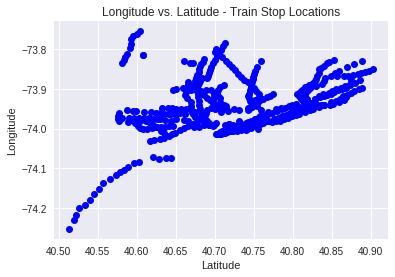

In [0]:
# Basic Data Visualization
plt.plot(kstops['Lat'], kstops['Long'], 'bo')
# nyc_map = plt.imread('https://raw.githubusercontent.com/AstroNoodles/Mini-Projects/master/nyc_map.png', 0)
# plt.imshow()

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Longitude vs. Latitude - Train Stop Locations')

# Breadth-First Search and Goal Accomplishment (WIP)

Now to accomplish the breadth first search and complete the goal of the notebook!

In [0]:
def bfs(goal: str, start: str, dataset: dict):
    dq = deque()
    dq += dataset[start]
    visited = []
    while goal not in visited:
        item = dq.popleft()
        if item not in visited:
            print(item)
            visited.append(item)
    return visited

In [0]:
bfs('Pelham Pkwy', 'Hewes St', stops_to_transfers)
# HELP?